# Introduction to array programming in Julia


## Getting started


* Start the computer and boot into **Debian** (not Windows)
* Open Firefox and log in to the internet with your ULiège credentials
* Open a terminal (Application -> Utilities -> Terminal). This is how the terminal icon looks like: ![icon](img/gnome-terminal.svg)
* Launch Jupyter from the terminal with the command (please pay attention to uppercase versus lowercase; after typing the command you need hit the `⏎ Enter` key):

```bash
jupyter notebook 
``` 

* This should open a new window in your webbrowser. Click on `New ▼` and then `Julia 1.7` (or a higher version)
* Make sure that the kernel is set to `1.7`.


## What is Julia?
Julia is a programming language for scientific computing among others.

It can use to:
   * data processing, numerical modelling
   * data visulization (e.g. modules `PyPlot`)
   * parallel processing
   * statistics
   * optimization
   * machine learning
   * ...many more

Julia is freely available at https://julialang.org/downloads/.
The functionality of julia can be extended using packages.

To load a package (e.g. `Images`) one needs to load it with the command `using`:

```julia
using Images
```

If the package is not installed you will get an error message:

```
ERROR: ArgumentError: Package Images not found in current path.
- Run `import Pkg; Pkg.add("Images")` to install the Images package.
```

As shown in the error message, the package can be installed with:

```julia
import Pkg; Pkg.add("Images" )
```


# Julia exercise

This lecture aims to teach the basis of array programming in julia by examples. The focus is on arrays, because:

* Many oceanographic datasets are multidimensional arrays. For example:
     * satellite sea-surface temperature data are typicall 3d arrays where the dimensions are longitude, latitude and time.
     * output of numerical models are typicall 4d arrays where the dimensions are longitude, latitude, depth and time.
* The prupose of this lecture is to learn manipulating an array of data. To make it more visual, every students is asked to take a picture and transfer the picture to this computing (for example by sending yourself an email).
* Download the picture. Per default, Firefox places all downloaded in the folder `/home/students/Downloads`.
* Take note of the full path of the downloaded image, for example `/home/students/Downloads/IMG_abc_xyz.jpg` (with `.jpg`, the file extension)

Load the necessary modules (if some module is not installed, see the instructions above how to install it). Execute a cell by hitting `Shift-Enter`. `[*]` means that a cell is currently still running.

In [35]:
using Images
using PyPlot

The variable `filename` contains the full path of the image

In [69]:
# Image is from Wikipedia user Travailwiki (https://commons.wikimedia.org/wiki/File:Selfie_art.jpg)
# and availabe under the Attribution-ShareAlike 4.0 International
filename = "/home/abarth/Downloads/Selfie_art.jpg"

"/home/abarth/Downloads/Selfie_art.jpg"

Load the file and show the size of the image (in pixels)

In [37]:
img_source = Images.load(filename);
size(img_source)

(737, 737)

An image is a matrix of red, green, blue (RGB) values. Every value is an unsigned integer of 8 bits (`UInt8`).

In [38]:
typeof(img_source)

Matrix{RGB{N0f8}} (alias for Array{RGB{Normed{UInt8, 8}}, 2})

The width of the image

In [39]:
size(img_source,1)

737

The high of the image

In [40]:
size(img_source,2)

737

Resize the image to a width of 500 pixels keeping the aspect ratio:

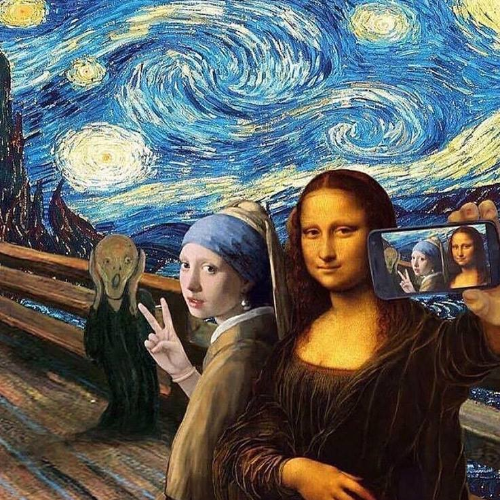

In [41]:
img_scaled = imresize(img_source,(500,500 * size(img_source,2) ÷  size(img_source,1)))

<div class="alert alert-block alert-info"><b>Oceanographic example:</b> datasets do not have often the same spatial resolution and one need to interpolate them on a common grid. This can be done using e.g. the module <code>Interpolations</code>.</div>

Instead of working with an 2D matrix of colors (RGB), it will be easier to work with an 3D array where the last dimensions is the 3 channels

In [42]:
img2 = channelview(img_scaled) # color (channel) will be an extra dimension
img3 = permutedims(img2,(2,3,1)) # change of the order of the dimension: height x width x channels
img3 = Float32.(img3) # convert to floating point numbers
size(img3)

(500, 500, 3)

This image values can be visualized with `imshow`. Notice the orientation of the axes. The 1st dimension is the y-axis and the 2nd dimension of the x-axis and the origin is in the top-left corner. This is a common convention for image processing, but for oceanographic data, the first dimension (resp. 2nd dimension) is typically the longitude (latitude) mapped on the x-axis and the origin is in the lower-left corner.

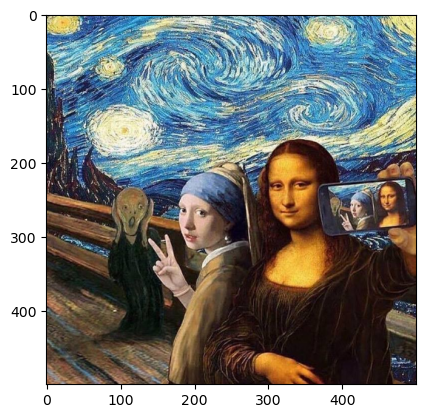

In [43]:
imshow(img3);

Get the color of the pixel (20,20):

In [44]:
img3[20,20,1], img3[20,20,2], img3[20,20,3]

(0.9411765f0, 0.8392157f0, 0.43529412f0)

<div class="alert alert-block alert-info"><b>Oceanographic data:</b> When validating a model with in situ data, one need to extract the model data at a specific location.</div>

Add a red pixel at the location (20,20). We will from now on make always a copy of the image to preserve the original.

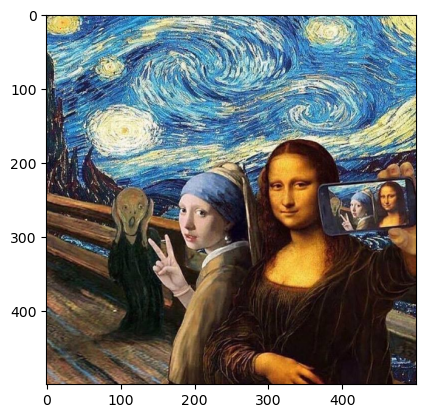

In [45]:
img4 = copy(img3)

img4[20,20,1] = 1 # red
img4[20,20,2] = 0 # green
img4[20,20,3] = 0 # blue

imshow(img4);

Show a subset of the image

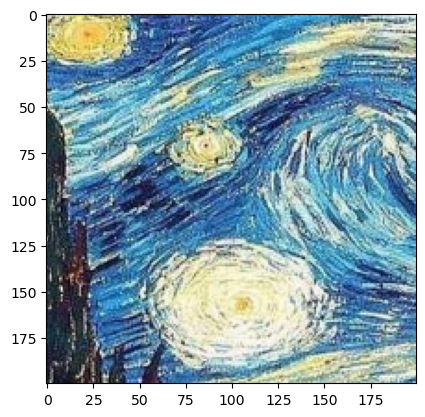

In [46]:
imshow(img3[1:200, 1:200,:]);

<div class="alert alert-block alert-info"><b>Oceanographic example:</b> some dataset cover often a larger zone and one need to subset it to the domain of interest.</div>

Set the color red to maximum value (1)

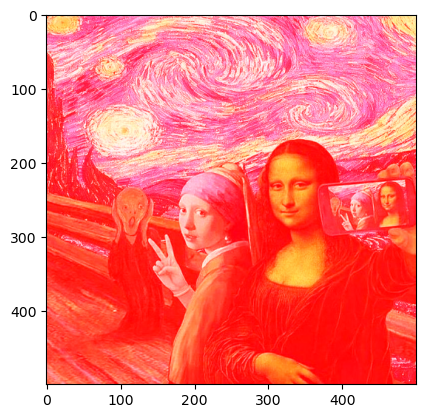

In [67]:
img4[:,:,1] .= 1

imshow(img4);

Add a red box from the pixel (1,1) to (20,20)

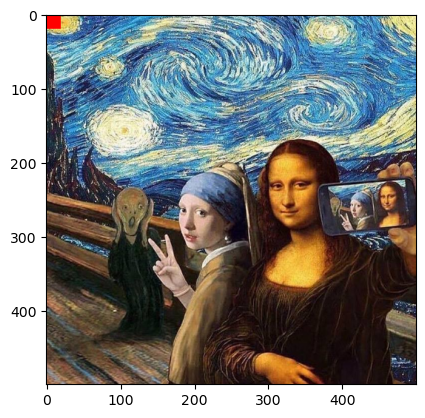

In [48]:
img4 = copy(img3)

img4[1:20,1:20,1] .= 1
img4[1:20,1:20,2] .= 0
img4[1:20,1:20,3] .= 0

imshow(img4);

Invert the color

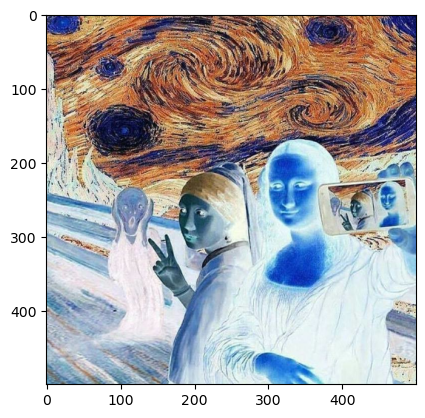

In [49]:
img4 = copy(img3)

img4 = 1 .- img4

imshow(img4);

Invert the color of a single channel

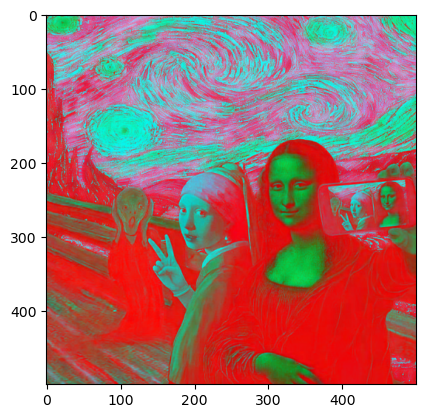

In [50]:
img4 = copy(img3)

img4[:,:,1] = 1 .- img4[:,:,1]

imshow(img4);

Show a single channel

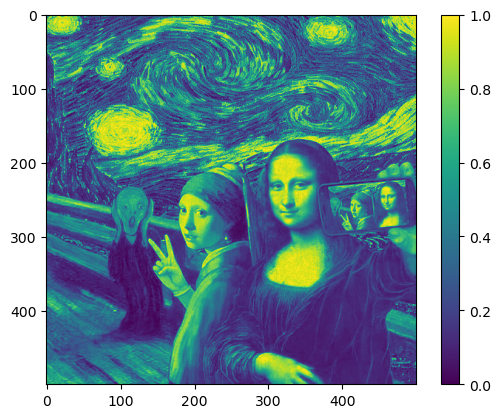

In [51]:
img4 = copy(img3)

red = img4[:,:,1]
green = img4[:,:,2]
blue = img4[:,:,3]

imshow(red); colorbar();

Recombine an image from different channels

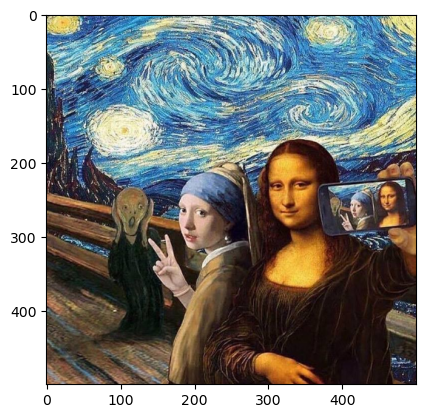

In [52]:
img4 = copy(img3)

red = img4[:,:,1]
green = img4[:,:,2]
blue = img4[:,:,3]

img = cat(red,green,blue,dims=3)
imshow(img);

Recombine them in a different order

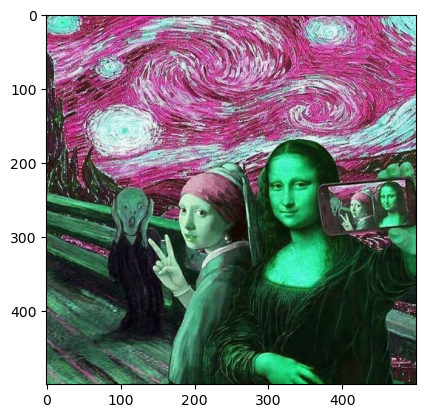

In [53]:
img = cat(blue,red,green,dims=3)
imshow(img);

Extract part of the image where the red channel is larger than 0.7 (or any other threshold).

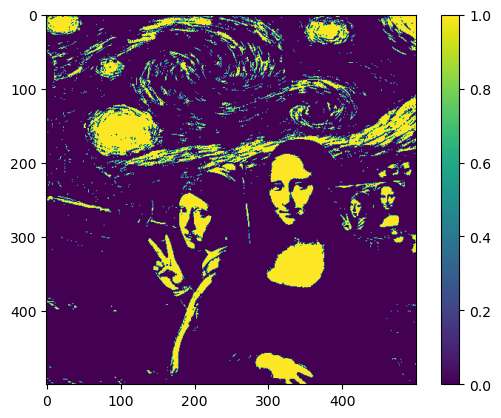

In [54]:
mask = red .> 0.7;
imshow(mask); colorbar();

<div class="alert alert-block alert-info"><b>Oceanographic example:</b> find the area where the temperature is higher than a given threshold.</div>

Set the red channel to zero where it is larger than 0.7.

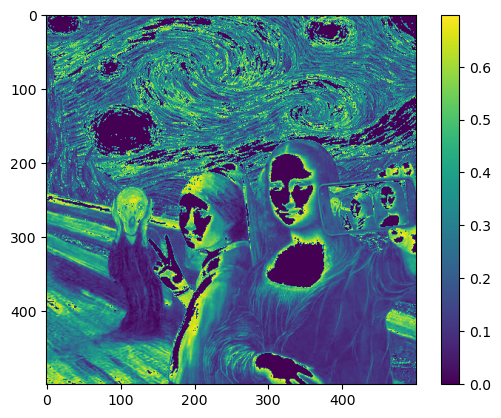

In [55]:
red2 = copy(red)
mask = red .> 0.7;
red2[mask] .= 0
imshow(red2); colorbar();

Transpose an image

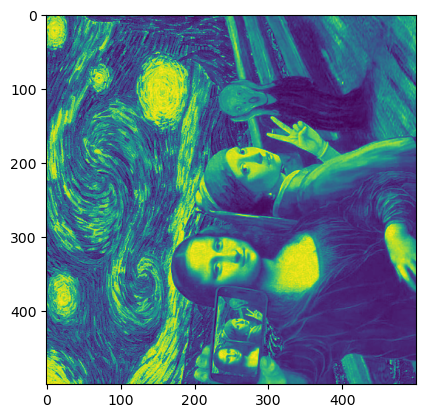

In [56]:
img = red'
imshow(img);

Reverse a single dimension

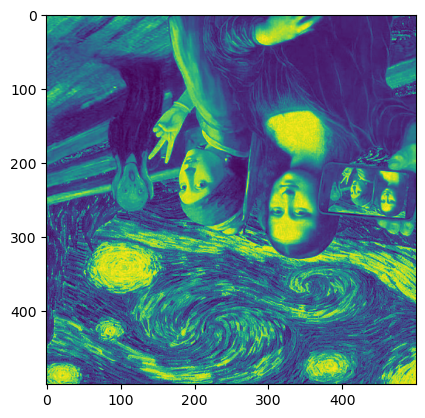

In [57]:
red_reversed = red[end:-1:1,:]

# one can also use the reverse function
# img = reverse(red,dims=1)

imshow(red_reversed);

Looping throught all elements of an array: compute the average of the red channel

In [58]:
img = red
average = 0.0

for j = 1:size(img,2)
     for i = 1:size(img,1)
          average = average + img[i,j]
     end        
end

average / (size(img,1) * size(img,2))

0.3751820790962614

Of course, computing the average is already implemented in julia (in the module `Statistics`)

In [59]:
using Statistics
mean(img)

<div class="alert alert-block alert-info"><b>Oceanographic example:</b> compute the average temperature</div>

Compute the finite difference along the 1nd dimension of the red channel (as an appoximation of the gradient)

$$
{G_x}_{i,j} = I_{i+1,j} - I_{i,j}
$$

where `I` is a 2D array, `G_x` the corresponding gradient and $i$ and $j$ are the indices.

In [70]:
gradient = zeros(size(img));

for j = 1:size(img,2)
     for i = 1:size(img,1)-1
          gradient[i,j] = img[i+1,j] - img[i,j]
     end        
end

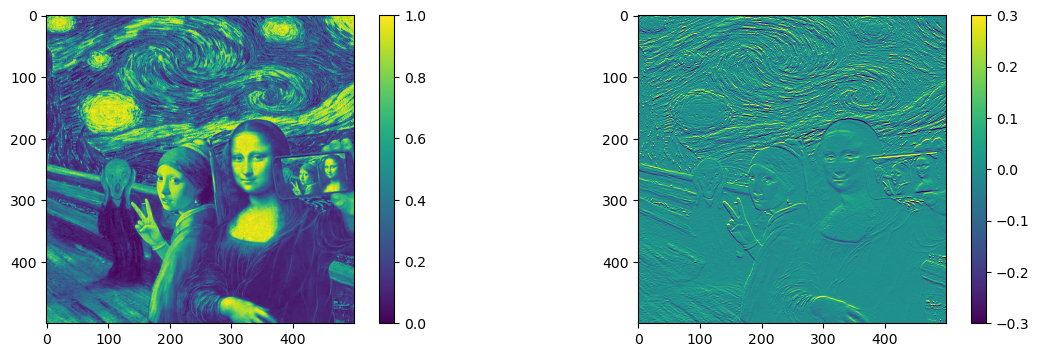

In [71]:
figure(figsize=(14,4))
subplot(1,2,1); imshow(img); colorbar()
subplot(1,2,2); imshow(gradient); clim(-0.3,0.3); colorbar();

<div class="alert alert-block alert-info"><b>Oceanographic example:</b> detect temperature fronts.</div>

Compute the (finite difference) Laplacian as:

$$
L_{i,j} = \frac{I_{i+1,j} + I_{i-1,j} + I_{i,j+1} + I_{i,j-1}}{4} - I_{i,j}
$$


In [63]:
laplacian = zeros(size(img));

for j = 2:size(img,2)-1
     for i = 2:size(img,1)-1
          laplacian[i,j] = (img[i+1,j] + img[i-1,j] + img[i,j+1] + img[i,j-1])/4 - img[i,j]
     end        
end

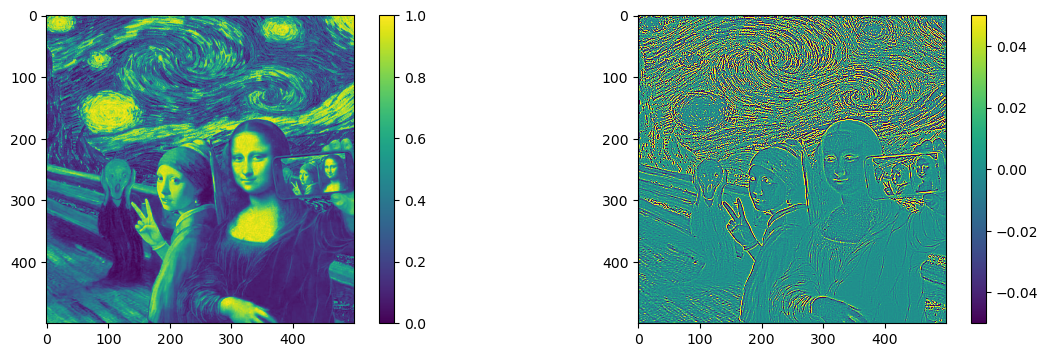

In [64]:
figure(figsize=(14,4))
subplot(1,2,1); imshow(img); colorbar()
subplot(1,2,2); imshow(laplacian); clim(-0.05,0.05); colorbar();

<div class="alert alert-block alert-info"><b>Oceanographic example:</b> tracer diffusion is implemented using the Laplacian operator.</div>

Implement the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator) and apply it to the red channel. Mathemacially `G` is defined as:

$$\begin{align}
{G_x}_{i,j} &= (I_{i-1,j-1} + 2\, I_{i-1,j} + I_{i-1,j+1}) - (I_{i+1,j-1} + 2 \, I_{i+1,j} + I_{i+1,j+1}) \\
{G_y}_{i,j} &= (I_{i-1,j-1} + 2\, I_{i,j-1} + I_{i+1,j-1}) - (I_{i-1,j+1} + 2 \, I_{i,j+1} + I_{i+1,j+1}) \\
G_{i,j} &= \sqrt{{G_x^2}_{i,j} + {G_y^2}_{i,j}} \\
\end{align}$$


In [65]:
G = zeros(size(img));

for j = 2:size(img,2)-1
     for i = 2:size(img,1)-1
        Gx = (img[i-1,j-1] + 2 * img[i-1,j] + img[i-1,j+1]) - (img[i+1,j-1] + 2 * img[i+1,j] + img[i+1,j+1])
        Gy = (img[i-1,j-1] + 2 * img[i,j-1] + img[i+1,j-1]) - (img[i-1,j+1] + 2 * img[i,j+1] + img[i+1,j+1])
        G[i,j] = sqrt(Gx^2 + Gy^2)
     end        
end

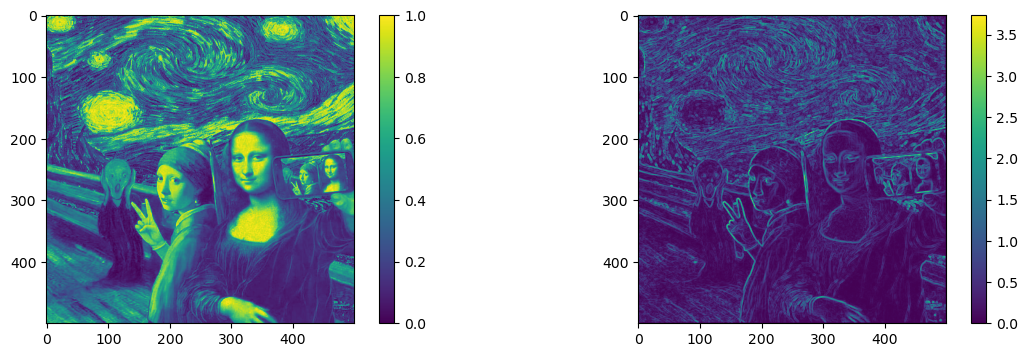

In [66]:
figure(figsize=(14,4))
subplot(1,2,1); imshow(img); colorbar()
subplot(1,2,2); imshow(G); colorbar();

<div class="alert alert-block alert-info"><b>Oceanographic example:</b> The governing equations of numerical models can be implemented using finite difference schemes</div>